### Score: 26

Q1.[7]

Q2.[10+9]

Assignment 04
Out: 11/20 19:00
Due: 12/04 19:00

Instructions
Collaboration:

Collaboration on solving the assignment is allowed, after you have thought about the problem sets on your own. It is also OK to get clarification (but not solutions) from online resources, again after you have thought about the problem sets on your own.

There are two requirements for collaboration:

Cite your collaborators fully and completely (e.g., “XXX explained to me what is asked in problem set 3”). Or cite online resources (e.g., “I got inspired by reading XXX”) that helped you.

Write your scripts and report independently - the scripts and report must come from you only.

Submitting your assignment:

Please write a report PS4.pdf.

Create a jupyter notebook named PS4.ipynb.

Upload your jupyter notebook and report to your Github ESE5023_Assignments_XXX repository (where XXX is your SUSTech ID) before the due time.

Late Submission:

Late submissions will not receive any credit. The submission time will be determined based on your latest GitHub file records.

1. Global Earthquakes
In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

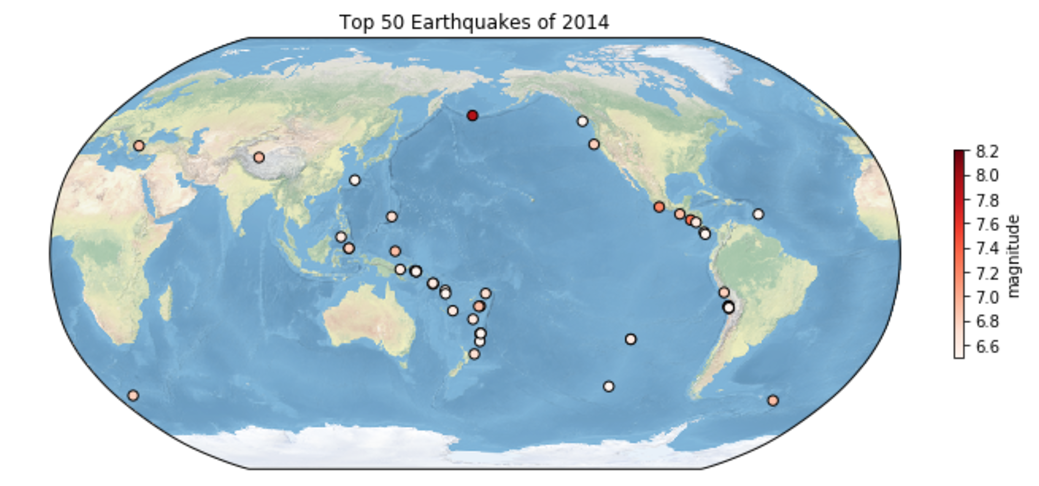

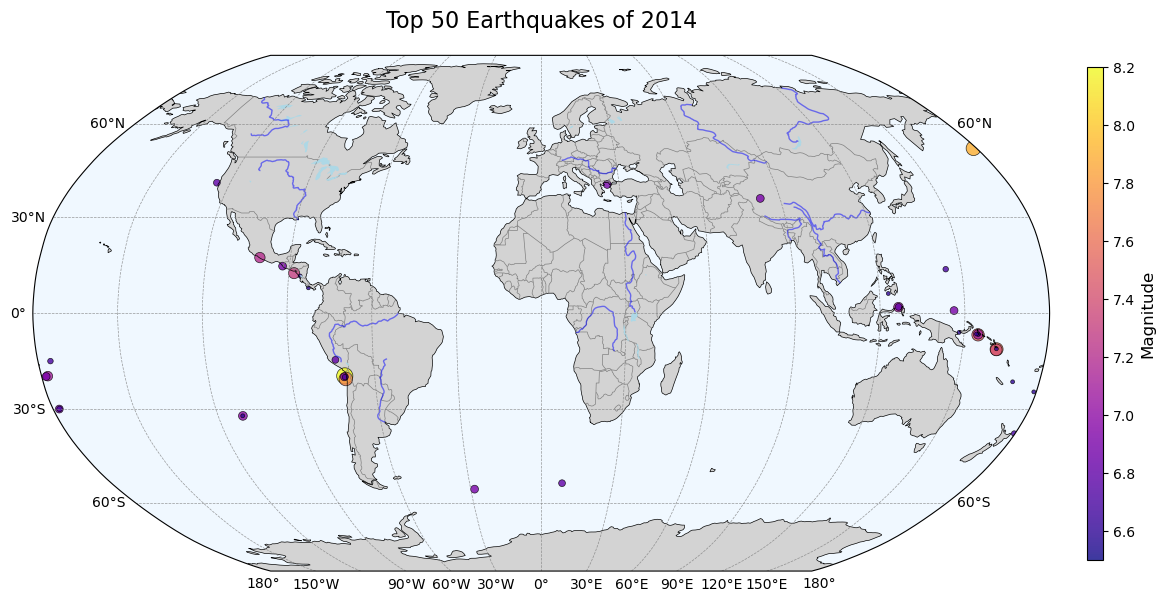

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
os.environ["CARTOPY_USER_BACKGROUNDS"] = r"C:\cartopy_cache"
from matplotlib.ticker import FixedLocator, FixedFormatter

# 读取数据
file_path = r'C:\Users\zjm\Desktop\ESE_5023\usgs_earthquakes.csv'  # 修改为你的实际路径
data = pd.read_csv(file_path)

# 筛选出2014年的地震事件并按震级排序，取前50个
data['time'] = pd.to_datetime(data['time'])  # 确保时间列为日期格式
data_2014 = data[data['time'].dt.year == 2014]
top_50 = data_2014.nlargest(50, 'mag')

# 获取经纬度和震级
lons = top_50['longitude']
lats = top_50['latitude']
magnitudes = top_50['mag']

# 创建绘图
plt.figure(figsize=(16, 8))
ax = plt.axes(projection=ccrs.Robinson())

# 添加地理特征
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='aliceblue')
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.RIVERS, edgecolor='blue', alpha=0.5)
ax.set_global()

# 添加经纬度网格线
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.8, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlocator = FixedLocator(range(-180, 181, 30))
gl.ylocator = FixedLocator(range(-90, 91, 30))
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# 绘制散点图
scatter = plt.scatter(
    lons, lats,
    c=magnitudes,
    s=(magnitudes - 6.5) * 80,  # 调整点的大小
    cmap='plasma',  # 使用更美观的颜色映射
    alpha=0.8,
    transform=ccrs.PlateCarree(),
    edgecolor='black', linewidth=0.5
)

# 添加颜色条
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.03, aspect=30, shrink=0.8)
cbar.set_label('Magnitude', fontsize=12)
cbar.ax.tick_params(labelsize=10)

# 添加标题
plt.title('Top 50 Earthquakes of 2014', fontsize=16, pad=20)

# 显示图像
# NOTE: 底图、投影中心和颜色映射应与例图一致 -3
plt.show()

2. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.

2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

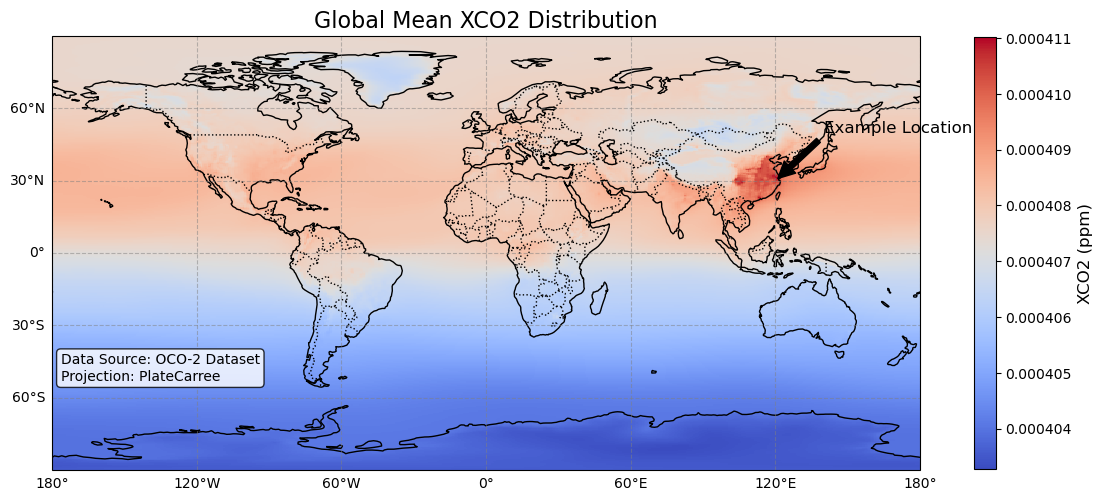

In [44]:
import xarray as xr
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# 定义文件路径模式
file_pattern = 'D:\\jupyter\\output_file\\*.nc4' 

# 获取所有匹配的文件路径
files = glob.glob(file_pattern)

# 读取和合并多个文件
ds = xr.open_mfdataset(files, combine='by_coords')

# 对时间维度求平均，得到 XCO2 的全球分布
mean_xco2 = ds['XCO2'].mean(dim='time')

# 创建图形并设置投影
fig, ax = plt.subplots(figsize=(14, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()})

# 绘制全球分布图
c = ax.pcolormesh(ds['lon'], ds['lat'], mean_xco2, 
                  transform=ccrs.PlateCarree(), cmap='coolwarm')

# 添加地图特征
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# 添加网格线
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

# 设置标题、x轴和y轴
ax.set_title("Global Mean XCO2 Distribution", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('XCO2 (ppm)', fontsize=12)

# 添加文本框
text = "Data Source: OCO-2 Dataset\nProjection: PlateCarree"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.01, 0.2, text, transform=ax.transAxes, fontsize=10,
        verticalalignment='bottom', bbox=props)

# 添加注释（示例：标记某个经纬度点）
ax.annotate('Example Location', xy=(120, 30), xytext=(140, 50),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)

# 显示图形
plt.show()

2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

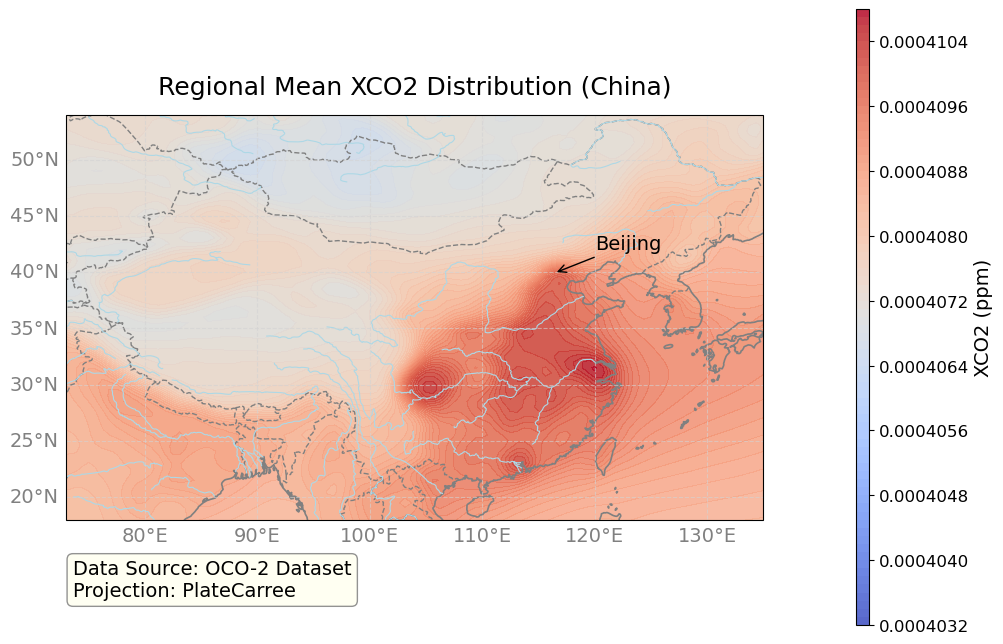

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.ndimage import gaussian_filter

# 对时间维度求平均，得到 XCO2 的区域分布
mean_xco2 = ds['XCO2'].mean(dim='time')

# 对数据进行平滑处理
smoothed_xco2 = gaussian_filter(mean_xco2, sigma=1.2)

# 限定区域范围（例如中国）
lon_min, lon_max = 73, 135
lat_min, lat_max = 18, 54

# 创建图形并设置投影
# NOTE: 应使用与2.1不同的投影方式 -1
fig, ax = plt.subplots(figsize=(12, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()})  # 使用 PlateCarree 投影

# 绘制区域分布图，柔和配色
c = ax.contourf(ds['lon'], ds['lat'], smoothed_xco2, levels=80, 
                transform=ccrs.PlateCarree(), cmap='coolwarm', alpha=0.85)

# 限定经纬度范围
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# 添加地图特征
ax.add_feature(cfeature.COASTLINE, linewidth=1.2, edgecolor='gray')
ax.add_feature(cfeature.BORDERS, linestyle='--', linewidth=1, edgecolor='gray')
ax.add_feature(cfeature.LAND, facecolor='beige', edgecolor='none')
ax.add_feature(cfeature.RIVERS, linewidth=0.8, edgecolor='lightblue')

# 添加网格线
gl = ax.gridlines(draw_labels=True, color='lightgray', alpha=0.6, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 14, 'color': 'gray'}
gl.ylabel_style = {'size': 14, 'color': 'gray'}

# 设置标题
ax.set_title("Regional Mean XCO2 Distribution (China)", fontsize=18, fontweight='medium', pad=15, color='black')

# 添加颜色条
cbar = plt.colorbar(c, ax=ax, orientation='vertical', pad=0.1, aspect=50)
cbar.set_label('XCO2 (ppm)', fontsize=14, color='black')
cbar.ax.tick_params(labelsize=12)

# 添加文本框
text = "Data Source: OCO-2 Dataset\nProjection: PlateCarree"
props = dict(boxstyle='round', facecolor='ivory', alpha=0.85, edgecolor='gray')
ax.text(0.01, -0.2, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='bottom', bbox=props)

# 添加注释（标记北京的位置）
ax.annotate('Beijing', xy=(116.4, 39.9), xytext=(120, 42),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14,
            transform=ccrs.PlateCarree())

# 显示图形
plt.show()